In [77]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

**Data Preprocessing Part 1**

In [3]:
#Open Dataset
ad_data = pd.read_csv('advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
#Drop Irrelevant Features
ad_features = ad_data.drop('Ad Topic Line',axis=1)
ad_features = ad_features.drop('City',axis=1)
ad_features = ad_features.drop('Country',axis=1)

ad_date = ad_features.copy()
ad_date['Timestamp'] = pd.to_datetime(ad_date['Timestamp'])

######Break Clicktime into Month and Time of Day######

# Extract Month
ad_date['Month'] = ad_date['Timestamp'].dt.month

#Extract Time of Day - 1 for Morning, 2 for Afternoon, 3 for Night
def time_category(hour):
    if 6 <= hour < 12:
        return 1
    elif 12 <= hour < 16:
        return 2
    else:
        return 3
ad_date['Time of Day'] = ad_date['Timestamp'].dt.hour.apply(time_category)
ad_date = ad_date.drop('Timestamp',axis=1)

# Move "Clicked on Ad" column to the last position
clicked_on_ad_column = ad_date.pop('Clicked on Ad')
ad_date['Clicked on Ad'] = clicked_on_ad_column

#Decouple Features and Target
ad_features = ad_date.drop('Clicked on Ad',axis=1)
ad_target = ad_date['Clicked on Ad']

ad_date.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Time of Day,Clicked on Ad
0,68.95,35,61833.90,256.09,0,3,3,0
1,80.23,31,68441.85,193.77,1,4,3,0
2,69.47,26,59785.94,236.50,0,3,3,0
3,74.15,29,54806.18,245.89,1,1,3,0
4,68.37,35,73889.99,225.58,0,6,3,0


**Data Visualization**

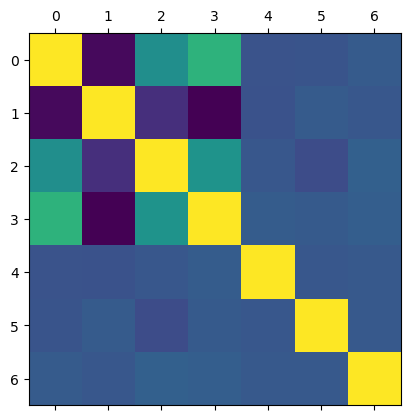

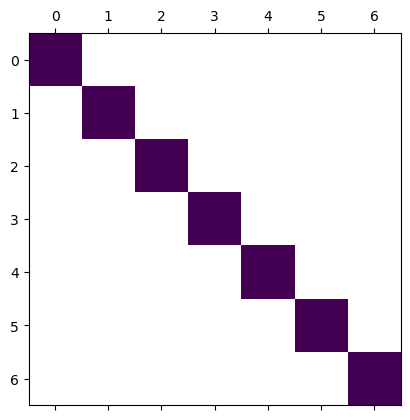

In [6]:
#Visualize Correlation
data_correlation = ad_features.corr()
data_high_correlation = data_correlation[abs(data_correlation) >= 0.6]
plt.matshow(data_correlation)
plt.matshow(data_high_correlation)




There seems to be some small correlation between the first few features, namely time spent on the site, age, area income, and daily internate user. However, the values did not meet our correlation cutoff point of 0.6 as visualized in the second heatmap, so these columns were left in the dataset as they were.




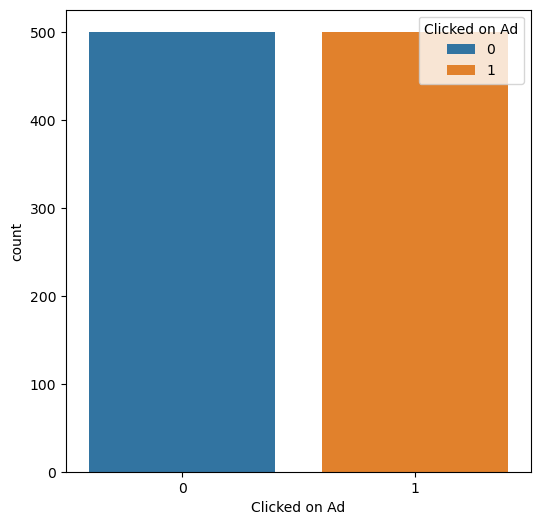

In [8]:
#Visualize Class Counts
plt.figure(figsize=(6, 6))
sns.countplot(x='Clicked on Ad', data=pd.DataFrame(ad_target, columns=['Clicked on Ad']), hue='Clicked on Ad') 
plt.show()

There appears to be equal levels of both classes in this dataset. Therefore, no rebalancing is necessary.

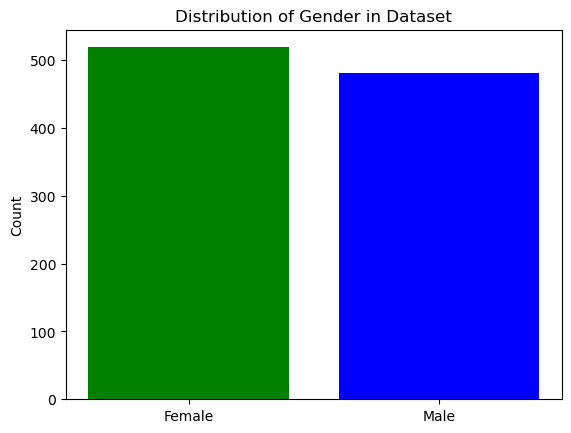

In [41]:
#Visualize Gender Counts

# Plot a bar chart
plt.bar(ad_features['Male'].value_counts().index, ad_date['Male'].value_counts().values, color=['green', 'blue'])

# Add labels and title
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Distribution of Gender in Dataset')

# Show the plot
plt.show()

**Data Preprocessing Part 2**

In [12]:
#Scale Features
standard_scale = StandardScaler()
standard_scale.fit(ad_features)
standardized_ad_features = standard_scale.fit_transform(ad_features)

In [13]:
#Split Data
x_train, x_test, y_train, y_test = train_test_split(ad_features, ad_target, train_size=.8, random_state=8000)

**Test Implementation of Sklearn Classifier to check dataset viability - DELETE LATER**


In [89]:
#Decision Tree Classifier Training
decision_tree = DecisionTreeClassifier(max_depth=5, criterion='entropy', max_leaf_nodes=10, random_state=8000)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       random_state=8000)

In [91]:
#Decision Tree Testing and Accuracy
decision_tree_predictions = decision_tree.predict(x_test)
dt_accuracy = accuracy_score(y_test, decision_tree_predictions)
dt_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
dt_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
dt_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')
print(dt_accuracy)
print(dt_precision)
print(dt_recall)
print(dt_f1)

0.93
0.9303286621635246
0.93
0.930070707070707


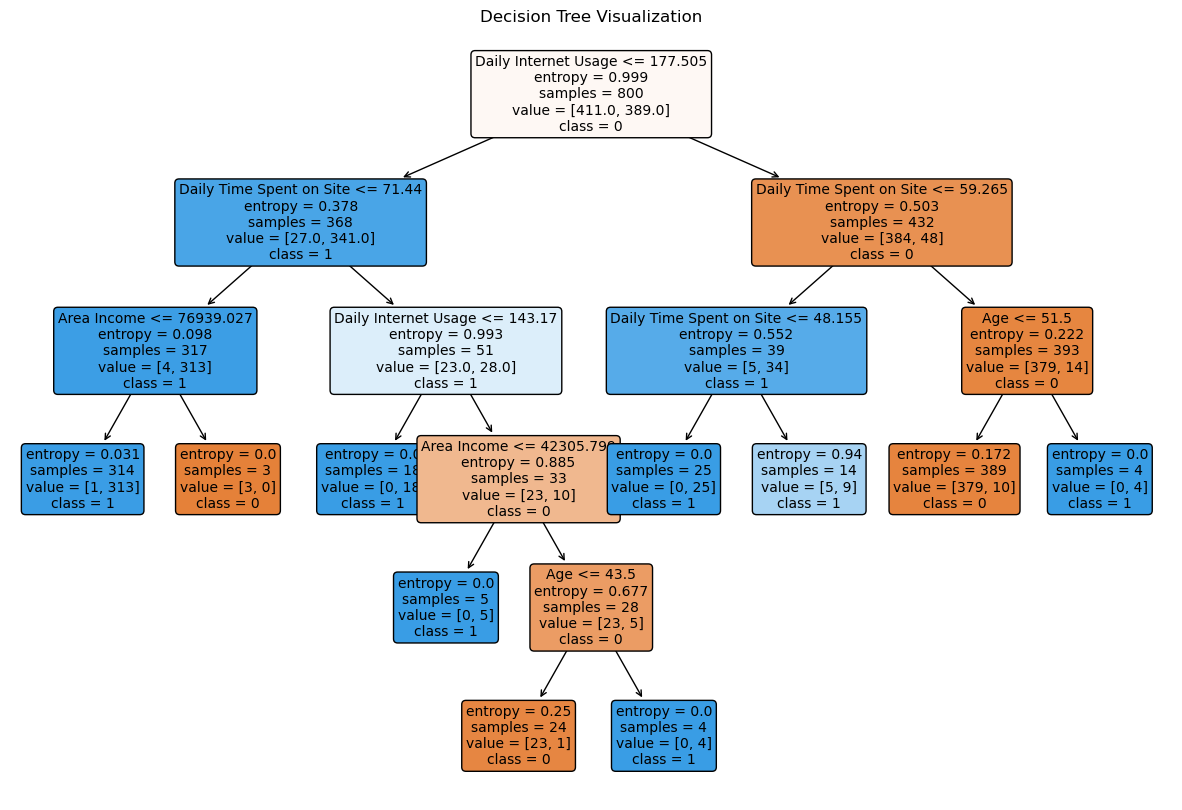

In [93]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(
    decision_tree,
    feature_names=x_train.columns,  # Replace with your feature names
    class_names=decision_tree.classes_.astype(str),  # Replace with your class names
    filled=True,  # Add color to the nodes based on class
    rounded=True,  # Round the edges of nodes
    fontsize=10,  # Adjust the font size
)
plt.title("Decision Tree Visualization")
plt.show()